## Evaluating Error in a Linear Regression

In [1]:
from pydataset import data

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
tips = data('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

##### Here is some sample code to get you started:

In [3]:
from sklearn.linear_model import LinearRegression

X = tips[['total_bill']]
y = tips.tip

# Adding a Baseline for predicting a tip (AKA: the mean of tips column)
tips['baseline'] = tips.tip.mean()

# Creating a Linear Model that predicts tips based off of total bill:
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

# compute predictions and add to original dataframe
tips['yhat'] = predictions
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


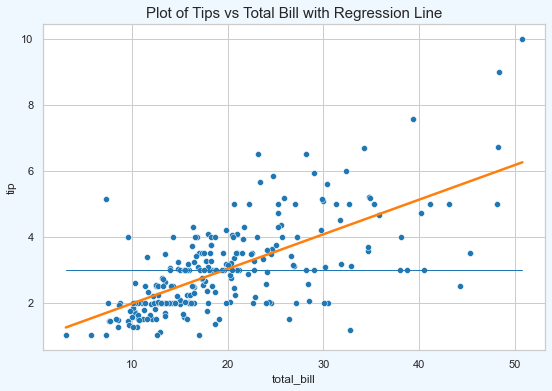

In [28]:
# Plot of tips and yhat regression line vs total bill

plt.figure(figsize = (9,6), facecolor="aliceblue")
sns.set_theme(style="whitegrid")

# Scatter Plot of tips vs total bill:
sns.scatterplot(x="total_bill", y="tip", data=tips, color="tab:blue")

# Plot of regression line:
sns.lineplot(x="total_bill", y="yhat",
             data=tips, color='tab:orange', linewidth=2.5)

sns.lineplot(x="total_bill", y="baseline",
             data=tips, color='tab:blue', linewidth=1)

plt.title("Plot of Tips vs Total Bill with Regression Line", fontsize = 15)
plt.show()

### 3. Plot the residuals for the linear regression model that you made.



In [7]:
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline
tips.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721


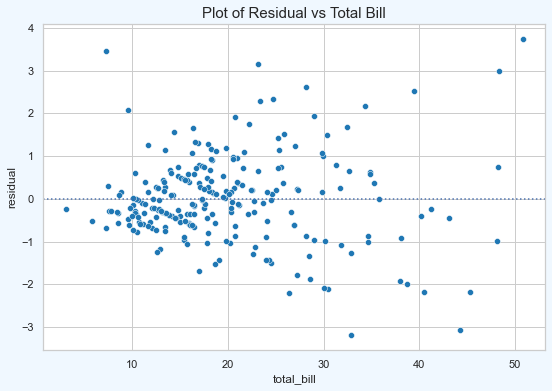

In [19]:
# Plot of residual vs Total Bill
plt.figure(figsize = (9,6), facecolor="aliceblue")
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'total_bill', y = 'residual', data = tips, color="tab:blue")
plt.axhline(0, ls = ':')
plt.title("Plot of Residual vs Total Bill", fontsize = 15)
plt.show()

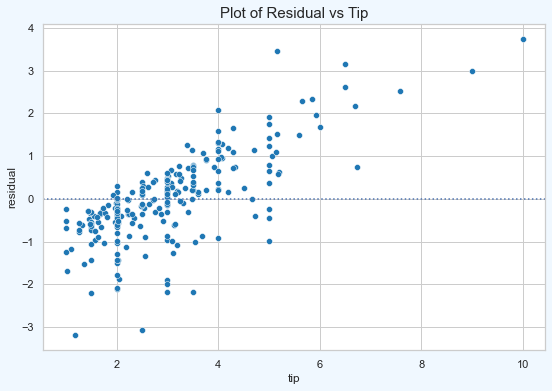

In [20]:
# Plot of residual vs Tip
plt.figure(figsize = (9,6), facecolor="aliceblue")
sns.set_theme(style="whitegrid")
sns.scatterplot(x = 'tip', y = 'residual', data = tips, color="tab:blue")
plt.axhline(0, ls = ':')
plt.title("Plot of Residual vs Tip", fontsize = 15)
plt.show()

* Not Heteroscedastic

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [29]:
# Sum of the Squared Errors = sum of residual squared: sum((y - yhat)^2)
# OLS = Ordinary Least Squares
SSE = (tips.residual**2).sum()
print(f' The SSE of the OLS model is: {round(SSE,2)}')

 The SSE of the OLS model is: 252.79


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).



### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



### 7. What is the amount of variance explained in your model?



### 8. Is your model better than the baseline model?



### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false


### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.